 ## COMPARISON BETWEEN ALGORITHM



In [35]:
### import all the required Library

import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 


#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
#find all files in the S1_Dataset. Note:- remove the readme file.

df_data= pd.read_csv("Sensor_Performance_data.csv",index_col=None)


In [37]:
df_data

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,micro avg,macro avg,weighted avg,Model1,Data Type
0,f1-score,0.85,0.44,1.00,0.52,0.93,0.70,0.92,Logistics Regression,Wearable Sensor Data
1,precision,0.78,0.72,0.99,0.94,0.93,0.86,0.93,Logistics Regression,Wearable Sensor Data
2,recall,0.95,0.32,1.00,0.36,0.93,0.66,0.93,Logistics Regression,Wearable Sensor Data
3,support,5010.00,1402.00,15426.00,701.00,22539.00,22539.00,22539.00,Logistics Regression,Wearable Sensor Data
4,Training Accuracy,NaN,NaN,NaN,NaN,NaN,0.92,NaN,Logistics Regression,Wearable Sensor Data
5,Test Accuracy,NaN,NaN,NaN,NaN,NaN,0.93,NaN,Logistics Regression,Wearable Sensor Data
6,Model_Time,NaN,NaN,NaN,NaN,NaN,82.63,NaN,Logistics Regression,Wearable Sensor Data
7,Specificity,0.92,0.99,0.98,1.00,NaN,NaN,NaN,Logistics Regression,Wearable Sensor Data
8,Negative predictive value,0.98,0.96,1.00,0.98,NaN,NaN,NaN,Logistics Regression,Wearable Sensor Data
9,Positive Likelihood Ratio,12.23,38.64,58.76,521.29,NaN,NaN,NaN,Logistics Regression,Wearable Sensor Data


In [38]:
df_data.columns

Index(['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'micro avg', 'macro avg', 'weighted avg', 'Model1',
       'Data Type'],
      dtype='object')

In [39]:
## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'f1-score']
Temp=Temp.sort_values(by=['Ambulating'])

In [40]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]


#Temp['Overdose'].round(decimals=2)

In [41]:
Temp

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,Model1
65,f1-score,0.80,0.00,0.98,0.00,SVM Classifier
52,f1-score,0.85,0.53,0.99,0.25,GBM Classification
26,f1-score,0.85,0.44,0.99,0.46,DNN Classifier
0,f1-score,0.85,0.44,1.00,0.52,Logistics Regression
39,f1-score,0.90,0.87,0.97,0.79,KNN Classifier
13,f1-score,0.99,0.98,1.00,0.88,Random Forest


[Text(0, 0.5, 'F-Score'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.8')

Text(0, 10, '0.85')

Text(0, 10, '0.85')

Text(0, 10, '0.85')

Text(0, 10, '0.9')

Text(0, 10, '0.99')

Text(0, 10, '0.0')

Text(0, 10, '0.53')

Text(0, 10, '0.44')

Text(0, 10, '0.44')

Text(0, 10, '0.87')

Text(0, 10, '0.98')

Text(0, 10, '0.98')

Text(0, 10, '0.99')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '0.97')

Text(0, 10, '1.0')

Text(0, 10, '0.0')

Text(0, 10, '0.25')

Text(0, 10, '0.46')

Text(0, 10, '0.52')

Text(0, 10, '0.79')

Text(0, 10, '0.88')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

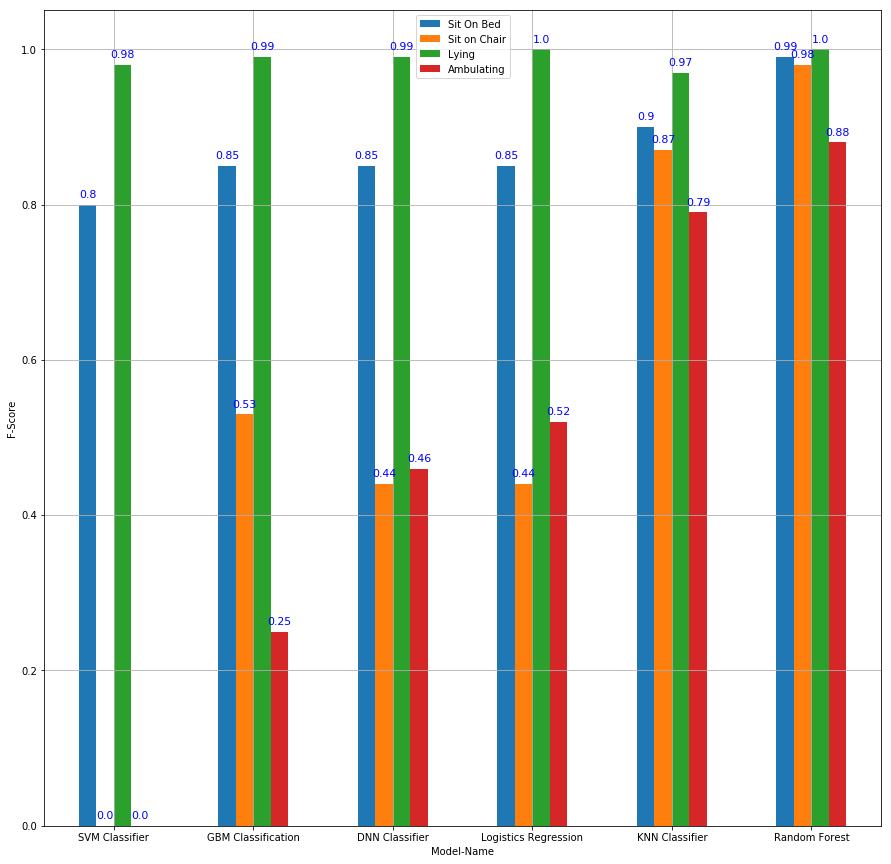

In [42]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
#fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar",figsize=(15,15) )
ax.set(xlabel = 'Model-Name', ylabel = 'F-Score')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/F-score comparison Data.PNG")




In [43]:

## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'precision']
Temp=Temp.sort_values(by=['Ambulating'])


In [44]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]

[Text(0, 0.5, 'Precision'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.71')

Text(0, 10, '0.76')

Text(0, 10, '0.91')

Text(0, 10, '0.77')

Text(0, 10, '0.78')

Text(0, 10, '0.98')

Text(0, 10, '0.0')

Text(0, 10, '0.84')

Text(0, 10, '0.88')

Text(0, 10, '0.87')

Text(0, 10, '0.72')

Text(0, 10, '0.97')

Text(0, 10, '0.96')

Text(0, 10, '0.99')

Text(0, 10, '0.96')

Text(0, 10, '0.98')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '0.0')

Text(0, 10, '0.59')

Text(0, 10, '0.85')

Text(0, 10, '0.9')

Text(0, 10, '0.94')

Text(0, 10, '0.95')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

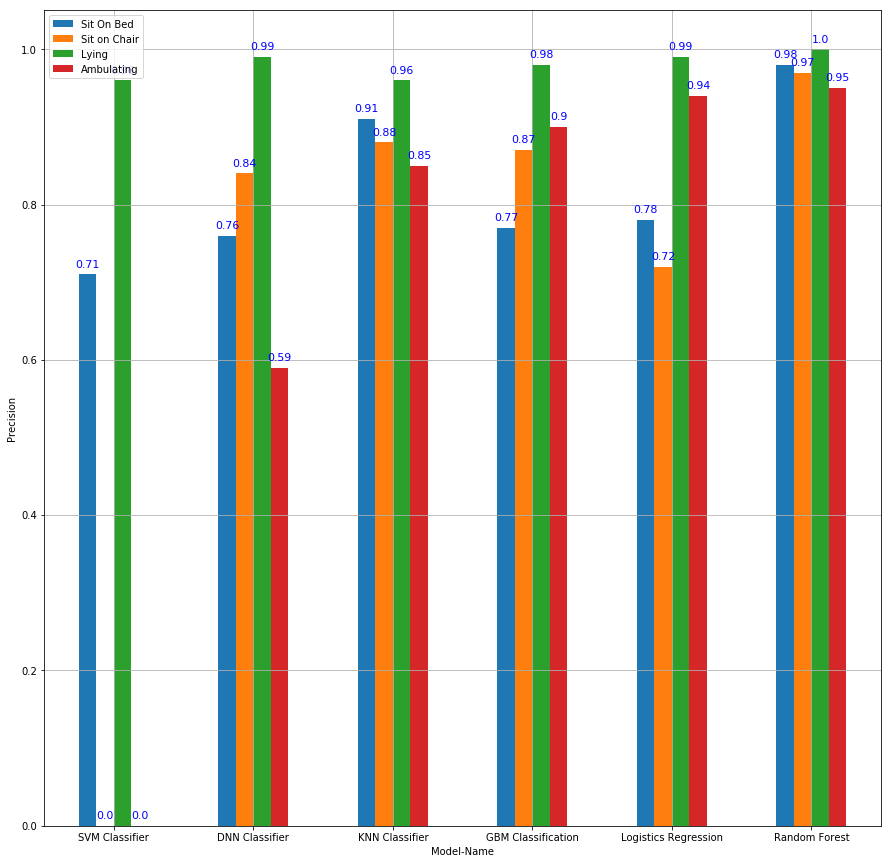

In [45]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
#fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar",figsize=(15,15) )
ax.set(xlabel = 'Model-Name', ylabel = 'Precision')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Precision comparison Data.PNG")








In [46]:

## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'recall']
Temp=Temp.sort_values(by=['Ambulating'])


In [47]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]

[Text(0, 0.5, 'recall'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.92')

Text(0, 10, '0.95')

Text(0, 10, '0.95')

Text(0, 10, '0.96')

Text(0, 10, '0.88')

Text(0, 10, '0.99')

Text(0, 10, '0.0')

Text(0, 10, '0.38')

Text(0, 10, '0.32')

Text(0, 10, '0.29')

Text(0, 10, '0.87')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '0.99')

Text(0, 10, '0.98')

Text(0, 10, '1.0')

Text(0, 10, '0.0')

Text(0, 10, '0.14')

Text(0, 10, '0.36')

Text(0, 10, '0.38')

Text(0, 10, '0.75')

Text(0, 10, '0.82')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

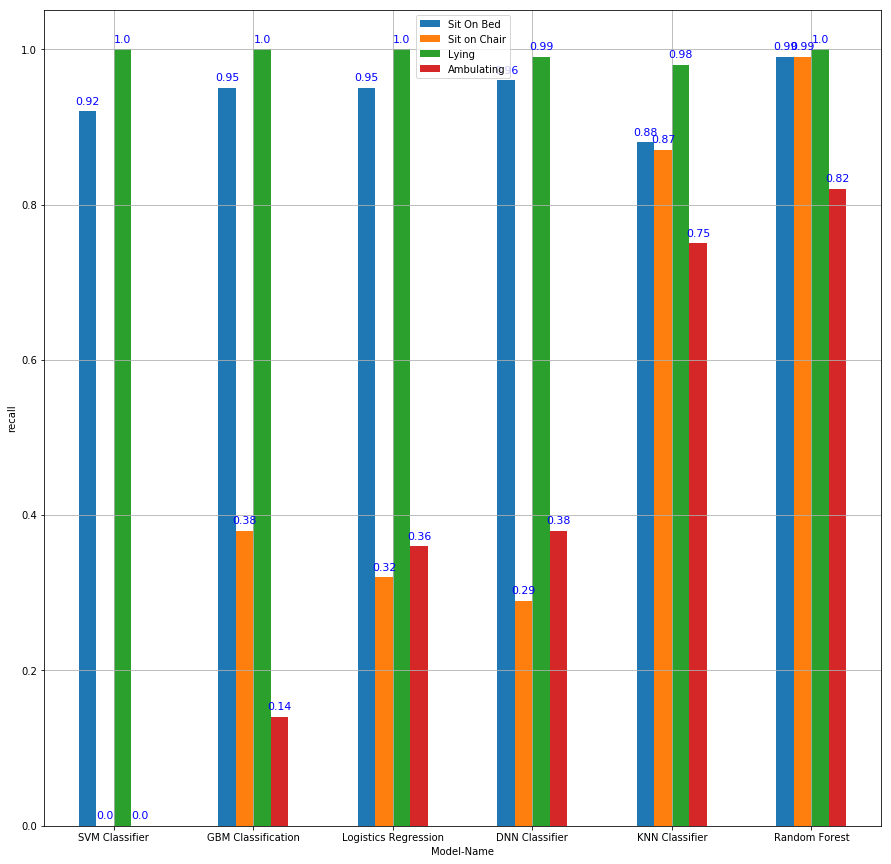

In [48]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar" ,figsize=(15,15))
ax.set(xlabel = 'Model-Name', ylabel = 'recall')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Recall comparison Data.PNG")






In [49]:
## plot Graph for record count for each Activity Label 
Temp = df_data[(df_data['Perfomance Matrix'] == 'Training Accuracy') |(df_data['Perfomance Matrix'] == 'Test Accuracy')] 
Temp=Temp.sort_values(by=['macro avg'])

In [50]:
Temp=Temp[['macro avg','Model1','Perfomance Matrix']]


Temp['macro avg']=Temp['macro avg'].round(decimals=2)

In [51]:
Temp['macro avg']=Temp['macro avg'].apply(lambda x:x*100)
          
#df['quantity'] = df['quantity'].apply(lambda x: x*-1)

No handles with labels found to put in legend.


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '89.0')

Text(0, 10, '92.0')

Text(0, 10, 'nan')

Text(0, 10, '92.0')

Text(0, 10, '100.0')

Text(0, 10, '100.0')

Text(0, 10, '89.0')

Text(0, 10, '93.0')

Text(0, 10, '92.0')

Text(0, 10, '92.0')

Text(0, 10, '94.0')

Text(0, 10, '99.0')

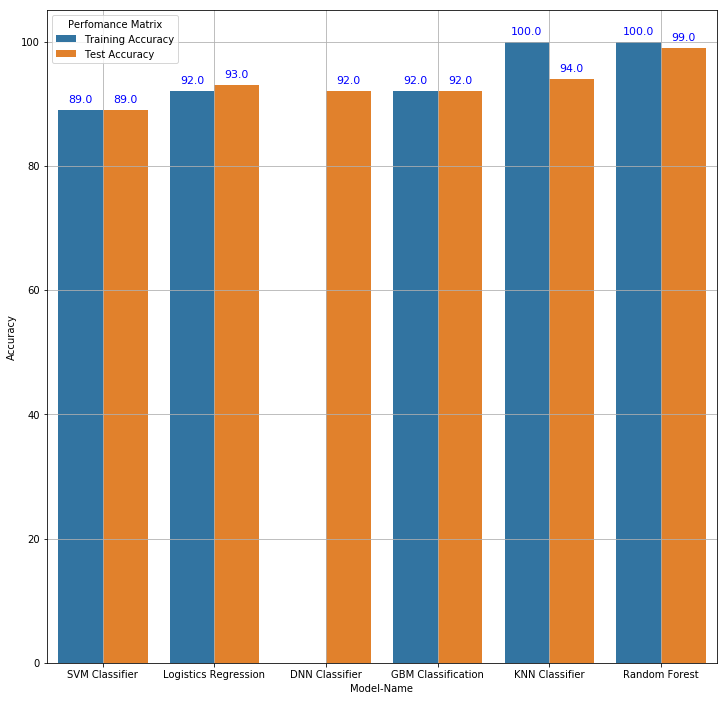

In [52]:
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(12,12))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
               )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Model1', y='macro avg', hue="Perfomance Matrix", data=ab )
ax.set(xlabel = 'Model-Name', ylabel = 'Accuracy')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

#fig.savefig("Accuracy comparison Data.PNG")
#fig.savefig("Accuracy comparison Data.PNG")
fig.savefig("Result_graph/Accuracy comparison Data.PNG")




In [53]:
df_data.columns

Index(['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'micro avg', 'macro avg', 'weighted avg', 'Model1',
       'Data Type'],
      dtype='object')

In [54]:
## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'Model_Time']
Temp=Temp.sort_values(by=['macro avg'])

In [55]:
Temp=Temp[['macro avg','Model1','Perfomance Matrix']]


Temp['macro avg']=Temp['macro avg'].round(decimals=2)

Temp

,macro avg,Model1,Perfomance Matrix
19,2.27,Random Forest,Model_Time
58,2.51,GBM Classification,Model_Time
45,5.41,KNN Classifier,Model_Time
6,82.63,Logistics Regression,Model_Time
32,86.50,DNN Classifier,Model_Time
71,1267.29,SVM Classifier,Model_Time


No handles with labels found to put in legend.


[Text(0, 0.5, 'Model_Time in ms'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '2.27')

Text(0, 10, '2.51')

Text(0, 10, '5.41')

Text(0, 10, '82.63')

Text(0, 10, '86.5')

Text(0, 10, '1267.29')

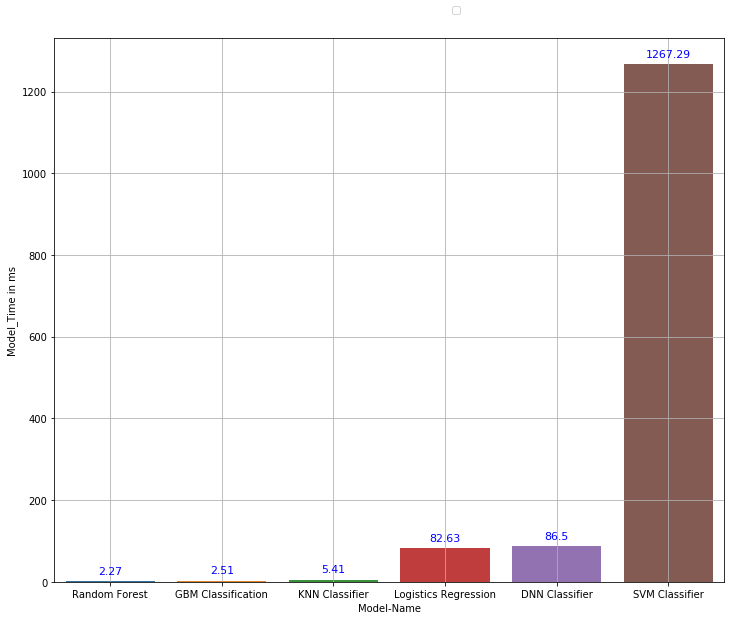

In [56]:
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(12,10))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
               )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Model1', y='macro avg', data=ab )
ax.set(xlabel = 'Model-Name', ylabel = 'Model_Time in ms')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

#fig.savefig("Model time comparison Data.PNG")
#fig.savefig("Accuracy comparison Data.PNG")
fig.savefig("Result_graph/Model time comparison Data.PNG")



In [57]:

## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'Specificity']
Temp=Temp.sort_values(by=['Ambulating'])


In [58]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]

[Text(0, 0.5, 'Specificity'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.92')

Text(0, 10, '0.92')

Text(0, 10, '0.99')

Text(0, 10, '0.98')

Text(0, 10, '0.92')

Text(0, 10, '0.89')

Text(0, 10, '1.0')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '0.99')

Text(0, 10, '0.98')

Text(0, 10, '1.0')

Text(0, 10, '0.92')

Text(0, 10, '0.97')

Text(0, 10, '0.91')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

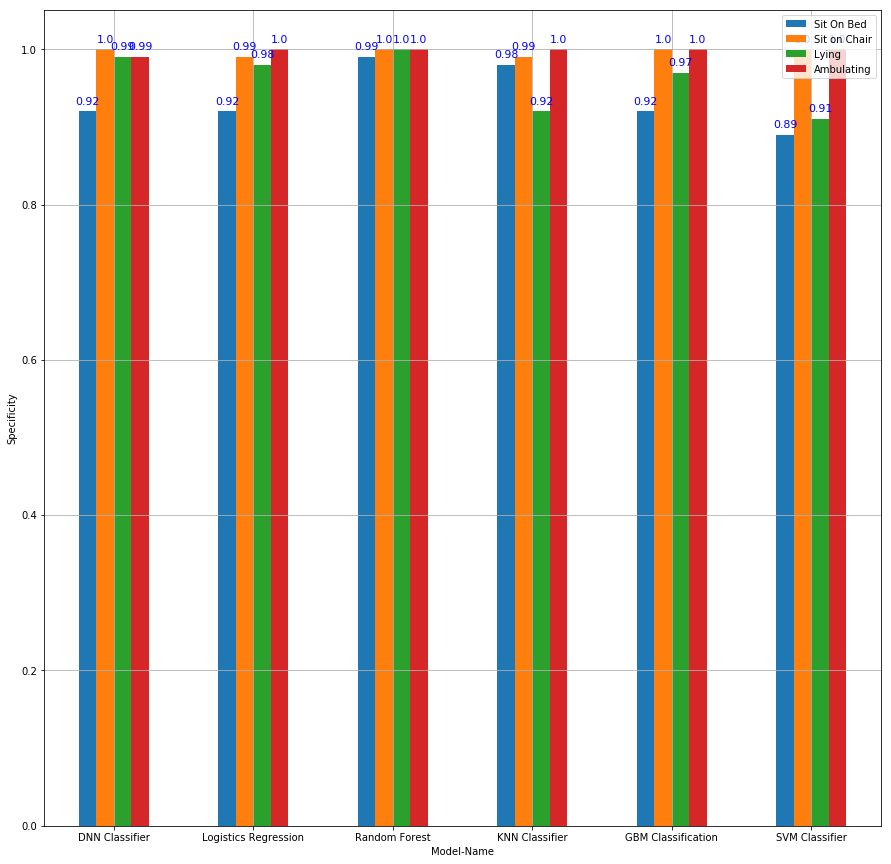

In [59]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar" ,figsize=(15,15))
ax.set(xlabel = 'Model-Name', ylabel = 'Specificity')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Specificity comparison Data.PNG")






In [60]:

## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'Negative predictive value']
Temp=Temp.sort_values(by=['Ambulating'])


In [61]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]

[Text(0, 0.5, 'Negative predictive value'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.98')

Text(0, 10, '0.97')

Text(0, 10, '0.98')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '0.97')

Text(0, 10, '0.96')

Text(0, 10, '0.94')

Text(0, 10, '0.96')

Text(0, 10, '0.96')

Text(0, 10, '1.0')

Text(0, 10, '0.99')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '1.0')

Text(0, 10, '0.97')

Text(0, 10, '1.0')

Text(0, 10, '0.95')

Text(0, 10, '0.97')

Text(0, 10, '0.97')

Text(0, 10, '0.98')

Text(0, 10, '0.98')

Text(0, 10, '0.99')

Text(0, 10, '0.99')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

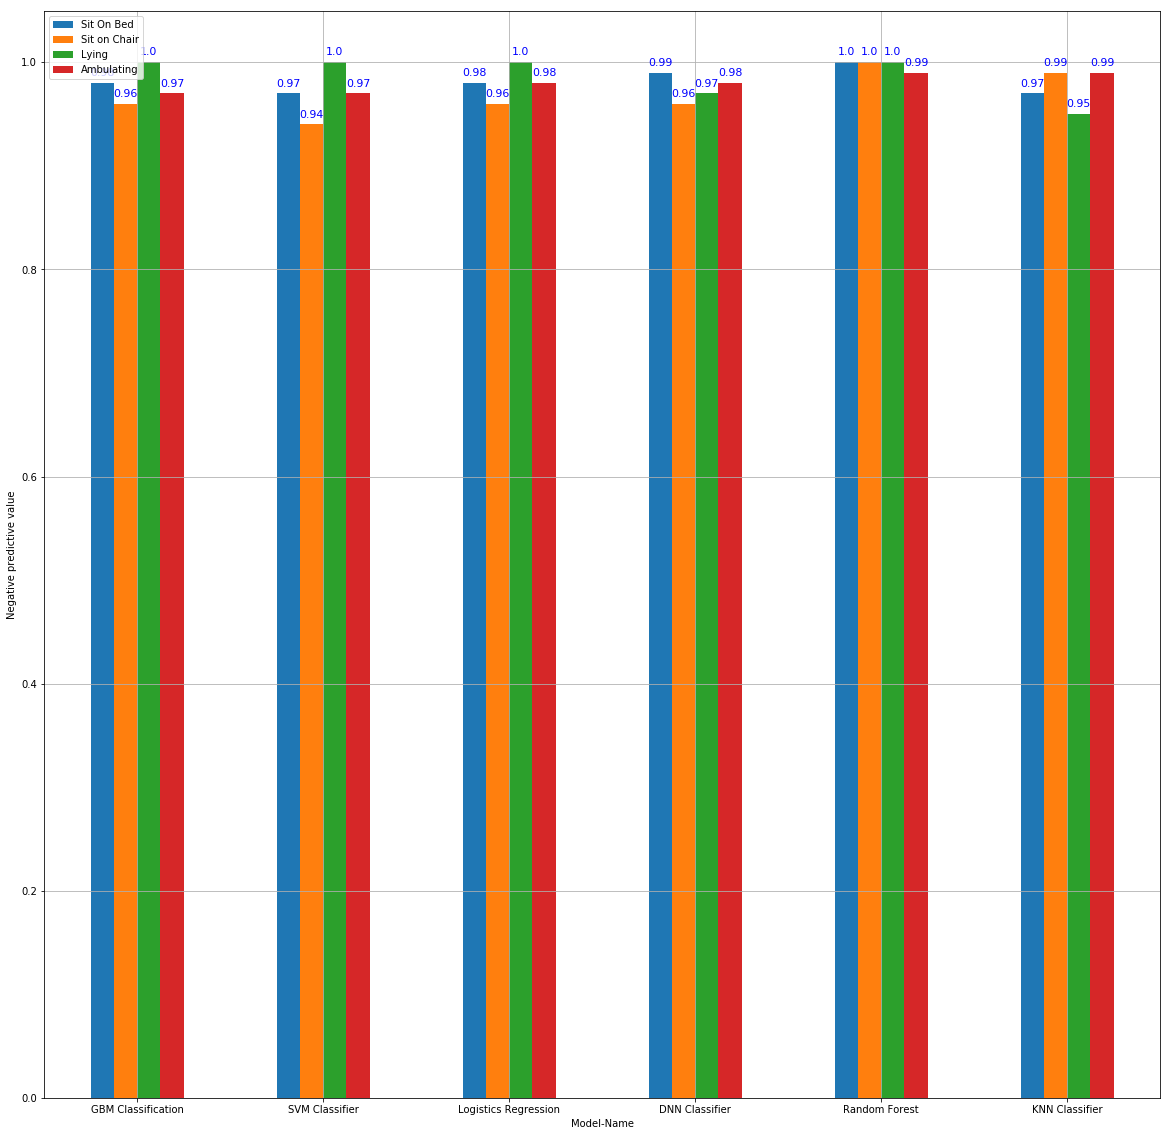

In [62]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar",figsize=(20,20))
ax.set(xlabel = 'Model-Name', ylabel = 'Negative predictive value')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Negative predictive value comparison Data.PNG")






In [63]:

#plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'Positive Likelihood Ratio']
Temp=Temp.sort_values(by=['Ambulating'])


In [64]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]

[Text(0, 0.5, 'Positive Likelihood Ratio'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '11.32')

Text(0, 10, '35.57')

Text(0, 10, '11.99')

Text(0, 10, '12.23')

Text(0, 10, '162.42')

Text(0, 10, '8.57')

Text(0, 10, '81.73')

Text(0, 10, '105.88')

Text(0, 10, '102.1')

Text(0, 10, '38.64')

Text(0, 10, '582.53')

Text(0, 10, '0.0')

Text(0, 10, '72.4')

Text(0, 10, '11.5')

Text(0, 10, '29.15')

Text(0, 10, '58.76')

Text(0, 10, '308.92')

Text(0, 10, '10.82')

Text(0, 10, '44.81')

Text(0, 10, '177.1')

Text(0, 10, '286.04')

Text(0, 10, '521.29')

Text(0, 10, '643.08')

Text(0, 10, '0.0')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

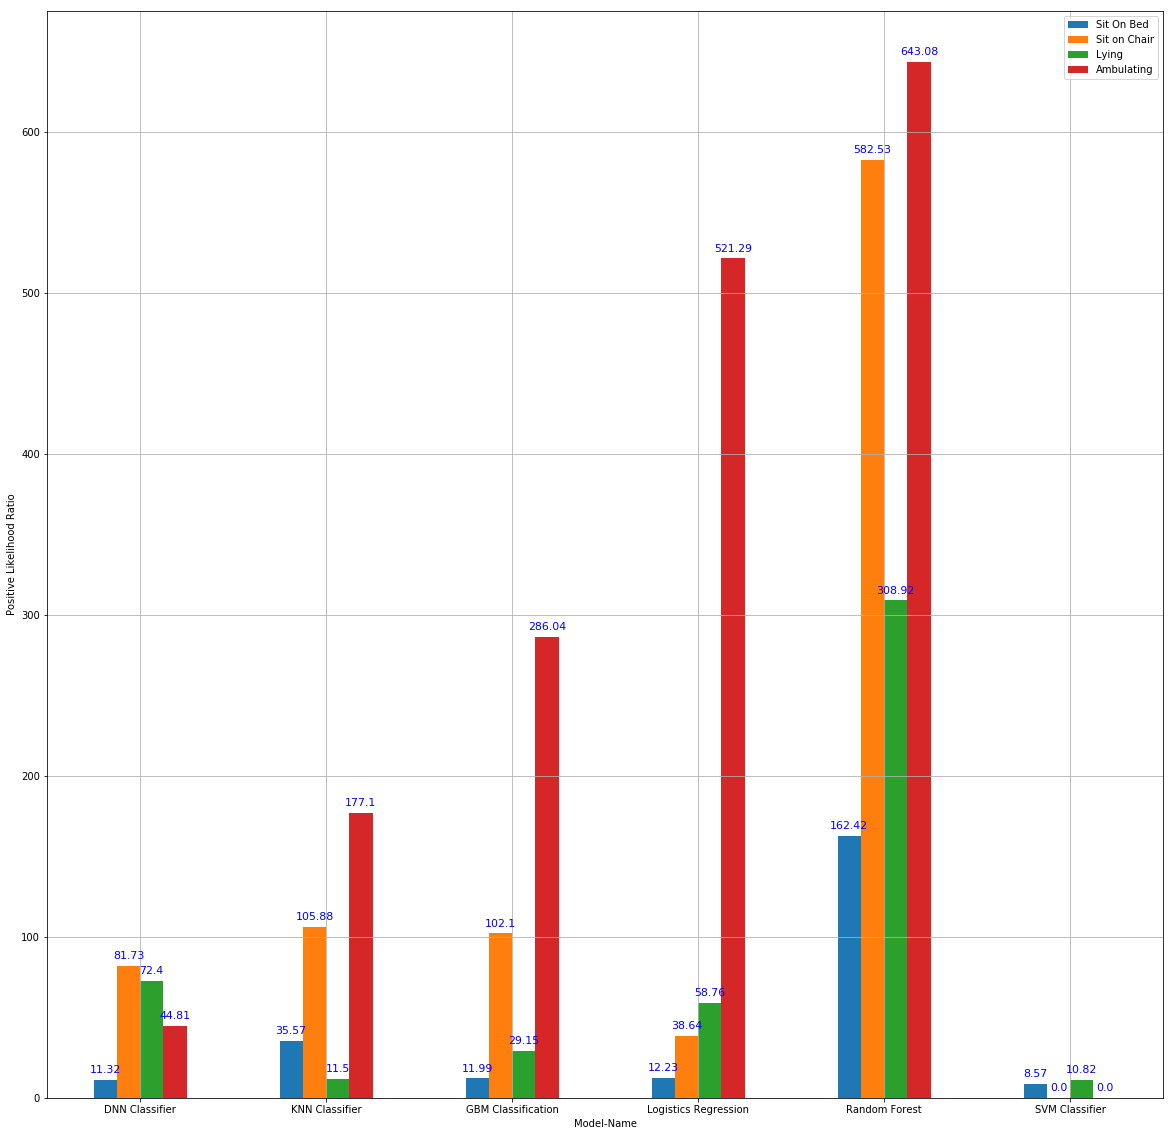

In [65]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar",figsize=(20,20) )
ax.set(xlabel = 'Model-Name', ylabel = 'Positive Likelihood Ratio')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Positive Likelihood Ratio comparison Data.PNG")






In [66]:
df_data

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,micro avg,macro avg,weighted avg,Model1,Data Type
0,f1-score,0.85,0.44,1.00,0.52,0.93,0.70,0.92,Logistics Regression,Wearable Sensor Data
1,precision,0.78,0.72,0.99,0.94,0.93,0.86,0.93,Logistics Regression,Wearable Sensor Data
2,recall,0.95,0.32,1.00,0.36,0.93,0.66,0.93,Logistics Regression,Wearable Sensor Data
3,support,5010.00,1402.00,15426.00,701.00,22539.00,22539.00,22539.00,Logistics Regression,Wearable Sensor Data
4,Training Accuracy,NaN,NaN,NaN,NaN,NaN,0.92,NaN,Logistics Regression,Wearable Sensor Data
5,Test Accuracy,NaN,NaN,NaN,NaN,NaN,0.93,NaN,Logistics Regression,Wearable Sensor Data
6,Model_Time,NaN,NaN,NaN,NaN,NaN,82.63,NaN,Logistics Regression,Wearable Sensor Data
7,Specificity,0.92,0.99,0.98,1.00,NaN,NaN,NaN,Logistics Regression,Wearable Sensor Data
8,Negative predictive value,0.98,0.96,1.00,0.98,NaN,NaN,NaN,Logistics Regression,Wearable Sensor Data
9,Positive Likelihood Ratio,12.23,38.64,58.76,521.29,NaN,NaN,NaN,Logistics Regression,Wearable Sensor Data


In [67]:

## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'Negative likelihood ratio ']
Temp=Temp.sort_values(by=['Ambulating'])
print(Temp)

             Perfomance Matrix  Sit On Bed  Sit on Chair    Lying  Ambulating  \
75  Negative likelihood ratio        10.68          1.00  1400.12        1.00   
62  Negative likelihood ratio        18.23          1.61  7448.42        1.17   
10  Negative likelihood ratio        17.98          1.45  2166.23        1.56   
36  Negative likelihood ratio        20.66          1.41    77.63        1.61   
49  Negative likelihood ratio         8.47          7.44    38.89        3.92   
23  Negative likelihood ratio       115.80        127.24   904.48        5.69   

    micro avg  macro avg  weighted avg                Model1  \
75        NaN        NaN           NaN        SVM Classifier   
62        NaN        NaN           NaN    GBM Classification   
10        NaN        NaN           NaN  Logistics Regression   
36        NaN        NaN           NaN        DNN Classifier   
49        NaN        NaN           NaN        KNN Classifier   
23        NaN        NaN           NaN         R

In [68]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]


In [69]:
Temp

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,Model1
75,Negative likelihood ratio,10.68,1.00,1400.12,1.00,SVM Classifier
62,Negative likelihood ratio,18.23,1.61,7448.42,1.17,GBM Classification
10,Negative likelihood ratio,17.98,1.45,2166.23,1.56,Logistics Regression
36,Negative likelihood ratio,20.66,1.41,77.63,1.61,DNN Classifier
49,Negative likelihood ratio,8.47,7.44,38.89,3.92,KNN Classifier
23,Negative likelihood ratio,115.80,127.24,904.48,5.69,Random Forest


[Text(0, 0.5, 'Negative likelihood ratio'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '10.68')

Text(0, 10, '18.23')

Text(0, 10, '17.98')

Text(0, 10, '20.66')

Text(0, 10, '8.47')

Text(0, 10, '115.8')

Text(0, 10, '1.0')

Text(0, 10, '1.61')

Text(0, 10, '1.45')

Text(0, 10, '1.41')

Text(0, 10, '7.44')

Text(0, 10, '127.24')

Text(0, 10, '1400.12')

Text(0, 10, '7448.42')

Text(0, 10, '2166.23')

Text(0, 10, '77.63')

Text(0, 10, '38.89')

Text(0, 10, '904.48')

Text(0, 10, '1.0')

Text(0, 10, '1.17')

Text(0, 10, '1.56')

Text(0, 10, '1.61')

Text(0, 10, '3.92')

Text(0, 10, '5.69')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

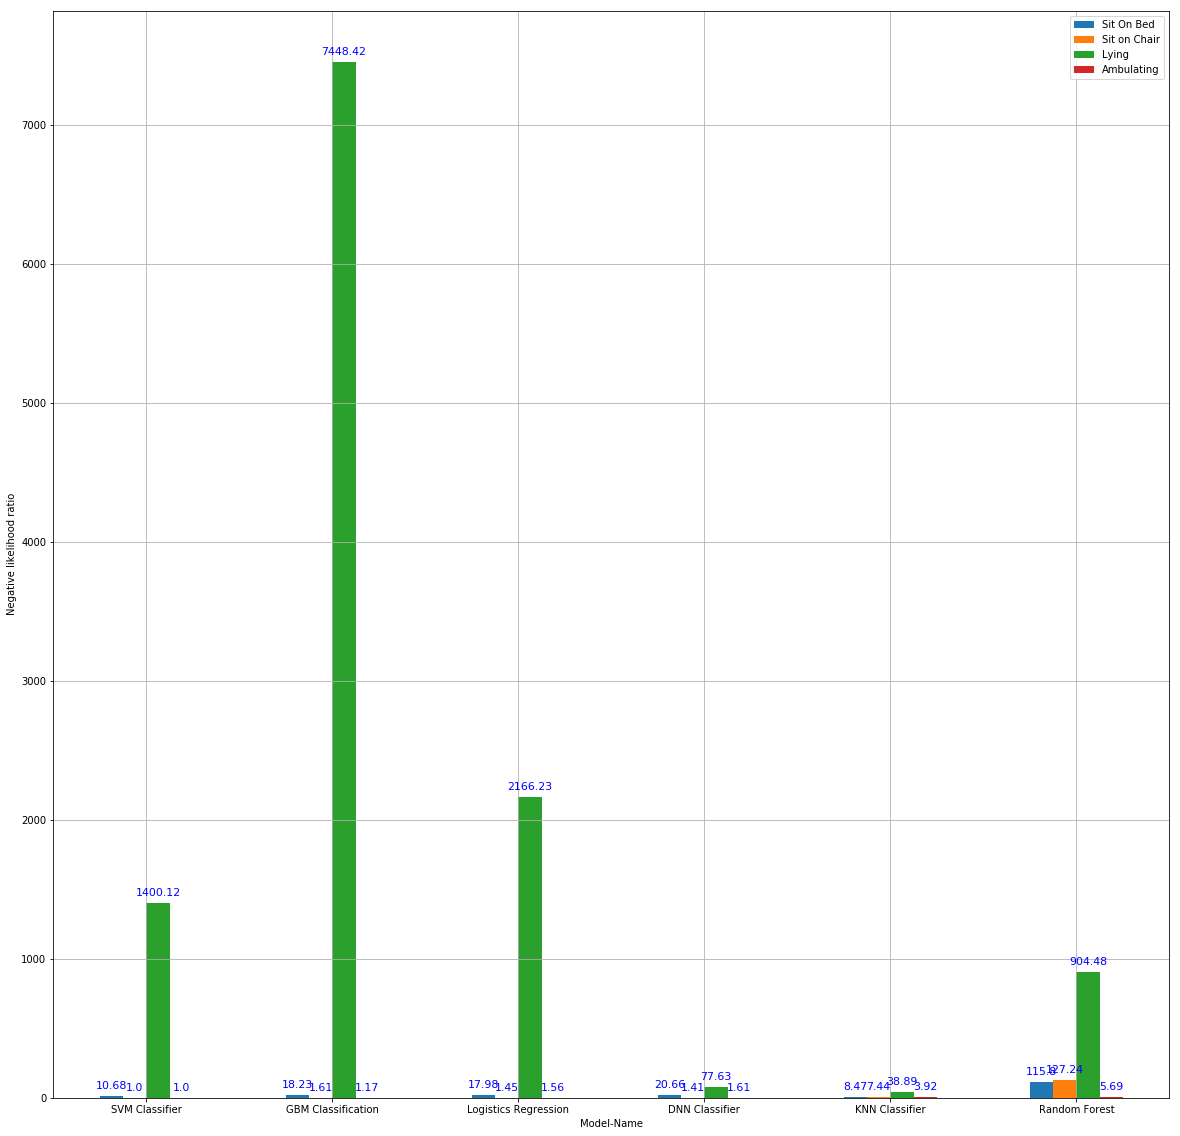

In [70]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar",figsize=(20,20) )
ax.set(xlabel = 'Model-Name', ylabel = 'Negative likelihood ratio')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Negative likelihood ratio comparison Data.PNG")






In [71]:

## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'Overall Misclassification Ratio']
Temp=Temp.sort_values(by=['Ambulating'])


In [72]:
Temp=Temp[['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'Model1']]

[Text(0, 0.5, 'Overall Misclassification Ratio'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.01')

Text(0, 10, '0.04')

Text(0, 10, '0.07')

Text(0, 10, '0.08')

Text(0, 10, '0.07')

Text(0, 10, '0.1')

Text(0, 10, '0.0')

Text(0, 10, '0.02')

Text(0, 10, '0.05')

Text(0, 10, '0.05')

Text(0, 10, '0.04')

Text(0, 10, '0.06')

Text(0, 10, '0.0')

Text(0, 10, '0.04')

Text(0, 10, '0.01')

Text(0, 10, '0.01')

Text(0, 10, '0.01')

Text(0, 10, '0.03')

Text(0, 10, '0.01')

Text(0, 10, '0.01')

Text(0, 10, '0.02')

Text(0, 10, '0.03')

Text(0, 10, '0.03')

Text(0, 10, '0.03')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

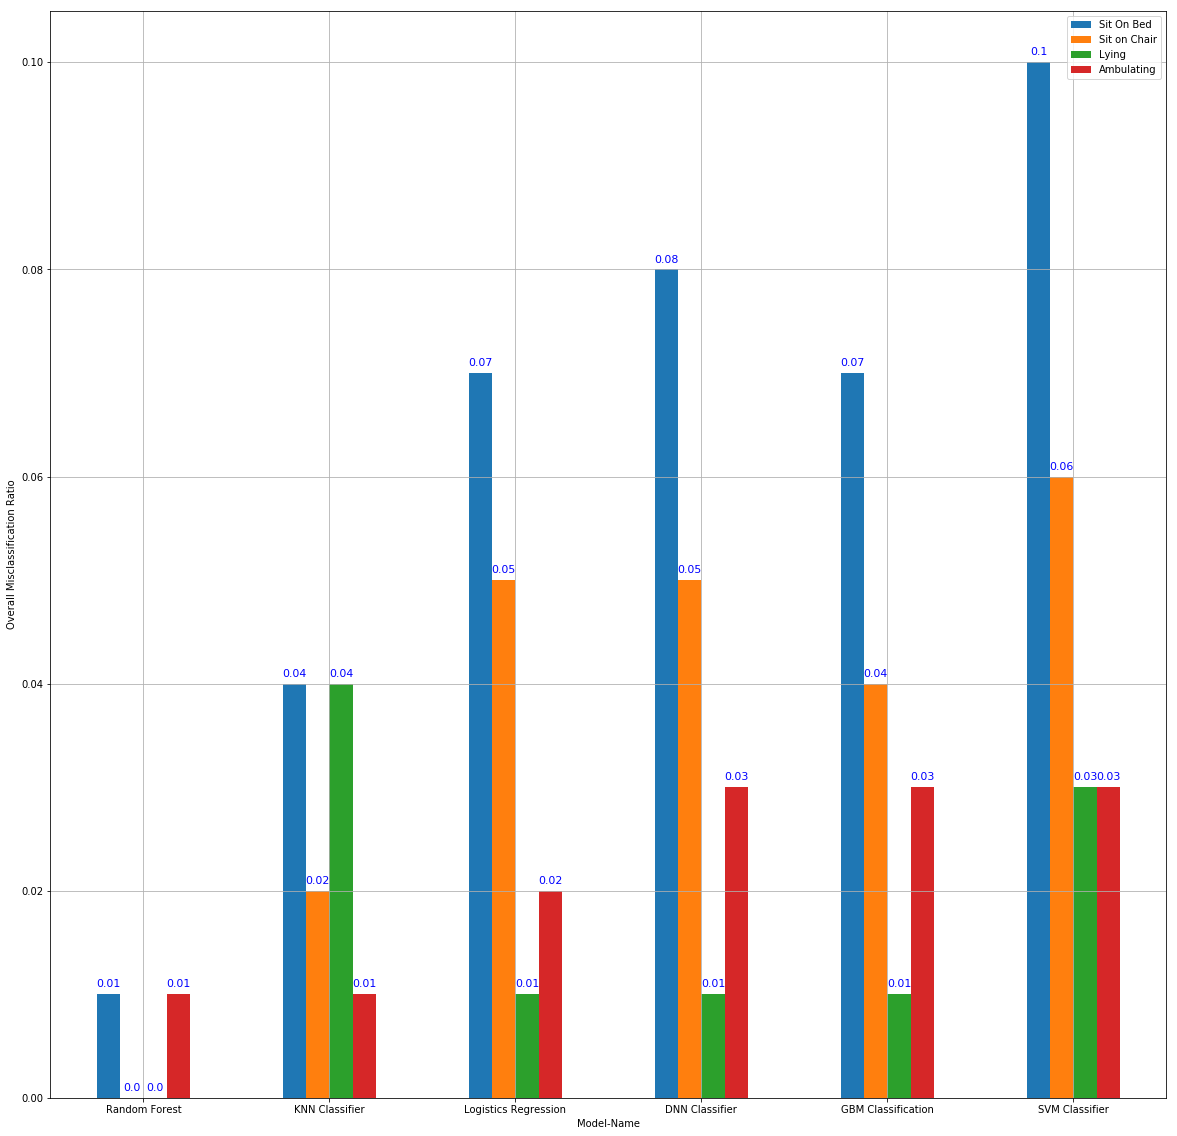

In [73]:
## plot Graph for record count for each Activity Label 

    
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(25,25))
#ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
#               )                 
#ax.get_title().set_fontsize('20')
ax = ab.plot(x='Model1', y=['Sit On Bed', 'Sit on Chair', 'Lying','Ambulating'], kind="bar" ,figsize=(20,20))
ax.set(xlabel = 'Model-Name', ylabel = 'Overall Misclassification Ratio')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.xticks(rotation=0)

plt.savefig("Result_graph/Overall Misclassification Ratio comparison Data.PNG")






In [74]:
## plot Graph for record count for each Activity Label 
Temp = df_data[df_data['Perfomance Matrix'] == 'ROC curve_Avergae']
Temp=Temp.sort_values(by=['macro avg'])

In [75]:
Temp=Temp[['macro avg','Model1','Perfomance Matrix']]

Temp['macro avg']=Temp['macro avg'].round(decimals=2)

No handles with labels found to put in legend.


[Text(0, 0.5, 'Roc Area'), Text(0.5, 0, 'Model-Name')]

Text(0, 10, '0.92')

Text(0, 10, '0.95')

Text(0, 10, '0.95')

Text(0, 10, '0.96')

Text(0, 10, '0.98')

Text(0, 10, '1.0')

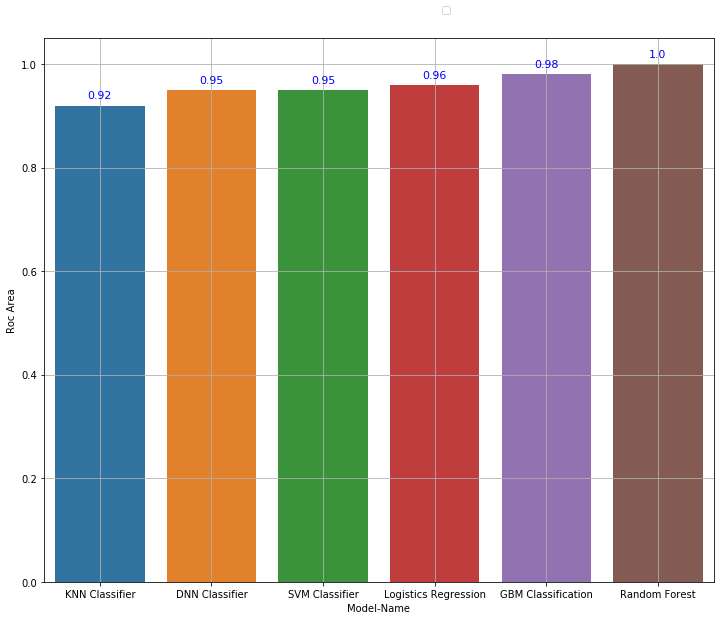

In [76]:
## plot Graph for record count for each Activity Label 

    
ab = Temp
fig=plt.figure(figsize=(12,10))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
               )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Model1', y='macro avg', data=ab )
ax.set(xlabel = 'Model-Name', ylabel = 'Roc Area')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

#fig.savefig("ROC area comparison Data.PNG")
fig.savefig("Result_graph/ROC area comparison Data.PNG")

